In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
crime = pd.read_csv('C:/Users/sabri/Documents/GitHub/NewYorkCityCrimes2015/Lab3_Individual_Files/Sabrina/FE1_NYPD_Complaint_Data_Historic.csv') # read in the csv %%file

C:\Users\sabri\Anaconda3\envs\ML7331\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
crime.describe()

,CMPLNT_NUM,KY_CD,PD_CD,ADDR_PCT_CD,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Duration,Duration_to_PD,Day,Year,GeoCell,GeoCell_X,GeoCell_Y
count,1.048575e+06,1.048575e+06,1.047842e+06,1.048574e+06,1.016158e+06,1.016158e+06,1.016158e+06,1.016158e+06,842416.000000,1.048510e+06,1.048510e+06,1.048510e+06,1.016123e+06,1.016157e+06,1.016124e+06
mean,5.497027e+08,2.953382e+02,4.099135e+02,6.380729e+01,1.004983e+06,2.067818e+05,4.073420e+01,-7.392516e+01,3.328113,1.359763e+01,1.552258e+01,2.014346e+03,5.844382e+01,6.444581e+00,6.199925e+00
std,2.598666e+08,1.505240e+02,2.192328e+02,3.434066e+01,2.146524e+04,3.043238e+04,8.353300e-02,7.741049e-02,5.232735,2.331575e+02,8.803343e+00,8.898275e-01,2.079365e+01,1.441555e+00,2.031922e+00
min,1.000007e+08,1.010000e+02,1.010000e+02,1.000000e+00,9.133190e+05,1.210800e+05,4.049877e+01,-7.425508e+01,0.000000,-2.410000e+02,1.000000e+00,1.910000e+03,1.000000e+00,1.000000e+00,1.000000e+00
25%,3.244583e+08,1.170000e+02,2.540000e+02,4.000000e+01,9.919982e+05,1.839220e+05,4.067144e+01,-7.397206e+01,1.000000,0.000000e+00,8.000000e+00,2.014000e+03,4.600000e+01,6.000000e+00,5.000000e+00
50%,5.494480e+08,3.410000e+02,3.570000e+02,6.600000e+01,1.004598e+06,2.053300e+05,4.073021e+01,-7.392661e+01,1.000000,0.000000e+00,1.500000e+01,2.014000e+03,5.600000e+01,6.000000e+00,6.000000e+00
75%,7.746526e+08,3.510000e+02,6.370000e+02,9.400000e+01,1.016552e+06,2.348090e+05,4.081116e+01,-7.388336e+01,2.000000,1.000000e+00,2.300000e+01,2.015000e+03,7.600000e+01,7.000000e+00,8.000000e+00
max,9.999996e+08,8.810000e+02,9.750000e+02,1.230000e+02,1.067226e+06,2.718200e+05,4.091272e+01,-7.370058e+01,24.000000,3.822300e+04,3.100000e+01,2.015000e+03,9.900000e+01,1.000000e+01,1.000000e+01


In [4]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 38 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   CMPLNT_NUM         1048575 non-null  int64  
 1   CMPLNT_FR_DT       1048510 non-null  object 
 2   CMPLNT_FR_TM       1048575 non-null  object 
 3   CMPLNT_TO_DT       842616 non-null   object 
 4   CMPLNT_TO_TM       843002 non-null   object 
 5   RPT_DT             1048575 non-null  object 
 6   KY_CD              1048575 non-null  int64  
 7   OFNS_DESC          1045695 non-null  object 
 8   PD_CD              1047842 non-null  float64
 9   PD_DESC            1047842 non-null  object 
 10  CRM_ATPT_CPTD_CD   1048574 non-null  object 
 11  LAW_CAT_CD         1048575 non-null  object 
 12  JURIS_DESC         1048575 non-null  object 
 13  BORO_NM            1048575 non-null  object 
 14  ADDR_PCT_CD        1048574 non-null  float64
 15  LOC_OF_OCCUR_DESC  830823 non-nu

In [5]:
# perform one-hot encoding of the categorical data on 'JURIS_DESC','BORO_NM','LOC_OF_OCCUR_DESC',
#'ADDR_PCT_CD','PREM_TYP_DESC','Day_Name','Month','Duration_lbl','Season','Daytime'
tmp_df = pd.get_dummies(crime.JURIS_DESC,prefix='JURIS_DESC')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.BORO_NM,prefix='BORO_NM')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.LOC_OF_OCCUR_DESC,prefix='LOC_OF_OCCUR_DESC')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.ADDR_PCT_CD,prefix='ADDR_PCT_CD')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.PREM_TYP_DESC,prefix='PREM_TYP_DESC')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Day_Name,prefix='Day_Name')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Month,prefix='Month')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Duration_lbl,prefix='Duration_lbl')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Season,prefix='Season')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Daytime,prefix='Daytime')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Daytime,prefix='OFNS_DESC')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Daytime,prefix='CRM_ATPT_CPTD_CD')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Daytime,prefix='LAW_CAT_CD')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

In [6]:
#Now we drop the original variables
if 'JURIS_DESC' in crime:    
    del crime['JURIS_DESC'] # get rid of the original category as it is now one-hot encoded
if 'BORO_NM' in crime:    
    del crime['BORO_NM'] # get rid of the original category as it is now one-hot encoded
if 'LOC_OF_OCCUR_DESC' in crime:    
    del crime['LOC_OF_OCCUR_DESC'] # get rid of the original category as it is now one-hot encoded
if 'ADDR_PCT_CD' in crime:    
    del crime['ADDR_PCT_CD'] # get rid of the original category as it is now one-hot encoded
if 'PREM_TYP_DESC' in crime:    
    del crime['PREM_TYP_DESC'] # get rid of the original category as it is now one-hot encoded
if 'Day_Name' in crime:    
    del crime['Day_Name'] # get rid of the original category as it is now one-hot encoded
if 'Month' in crime:    
    del crime['Month'] # get rid of the original category as it is now one-hot encoded
if 'Duration_lbl' in crime:    
    del crime['Duration_lbl'] # get rid of the original category as it is now one-hot encoded
if 'Season' in crime:    
    del crime['Season'] # get rid of the original category as it is now one-hot encoded
if 'Daytime' in crime:    
    del crime['Daytime'] # get rid of the original category as it is now one-hot encoded
if 'OFNS_DESC' in crime:    
    del crime['OFNS_DESC'] # get rid of the original category as it is now one-hot encoded
if 'CRM_ATPT_CPTD_CD' in crime:    
    del crime['CRM_ATPT_CPTD_CD'] # get rid of the original category as it is now one-hot encoded
if 'LAW_CAT_CD' in crime:    
    del crime['LAW_CAT_CD'] # get rid of the original category as it is now one-hot encoded


In [7]:
pd.set_option('display.max_rows', 300)
crime.dtypes

CMPLNT_NUM                                      int64
CMPLNT_FR_DT                                   object
CMPLNT_FR_TM                                   object
CMPLNT_TO_DT                                   object
CMPLNT_TO_TM                                   object
RPT_DT                                         object
KY_CD                                           int64
PD_CD                                         float64
PD_DESC                                        object
PARKS_NM                                       object
HADEVELOPT                                     object
X_COORD_CD                                    float64
Y_COORD_CD                                    float64
Latitude                                      float64
Longitude                                     float64
Lat_Lon                                        object
Start_Dt_Tm                                    object
End_Dt_Tm                                      object
Duration                    

In [8]:
#dropping variables that don't add value or have sizeable missing values
if 'CMPLNT_NUM' in crime: #randomly assigned case id
    del crime['CMPLNT_NUM']
if 'CMPLNT_FR_DT' in crime:  #Date and time references have been binned
    del crime['CMPLNT_FR_DT']
if 'CMPLNT_FR_TM' in crime:
    del crime['CMPLNT_FR_TM']
if 'CMPLNT_TO_DT' in crime:
    del crime['CMPLNT_TO_DT']
if 'CMPLNT_TO_TM' in crime:
    del crime['CMPLNT_TO_TM']
if 'Start_Dt_Tm' in crime:
    del crime['Start_Dt_Tm']
if 'End_Dt_Tm' in crime:
    del crime['End_Dt_Tm']
if 'RPT_DT' in crime:   #this is an unknown at the time of the crime in many cases
    del crime['RPT_DT']
if 'PD_DESC' in crime:  #duplicate information from PD_CD
    del crime['PD_DESC']
if 'Lat_Lon' in crime:
    del crime['Lat_Lon']
if 'PARKS_NM' in crime:    
    del crime['PARKS_NM']
if 'HADEVELOPT' in crime:    
    del crime['HADEVELOPT']
if 'LOC_OF_OCCUR_DESC' in crime:    
    del crime['LOC_OF_OCCUR_DESC']
if 'Latitude' in crime:    
    del crime['Latitude']
if 'Longitude' in crime:    
    del crime['Longitude']  

In [12]:
#dropping any remaining NANs


crime = crime.dropna() 

In [10]:
crime.isnull().values.any()
crime.isnull().sum().sum()

0

In [14]:
#sample the dataset
sample = crime.sample(frac =.05) 

Code chunk below from Clustering Validity Notebook (#10)

In [15]:
data = sample

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40896 entries, 1014583 to 135811
Columns: 238 entries, KY_CD to LAW_CAT_CD_Night
dtypes: float64(10), int64(1), uint8(227)
memory usage: 12.6 MB


In [20]:
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import numpy as np

n_clusters = 2
model = KMeans(init='k-means++', n_clusters=n_clusters, n_init=1).fit(data)
# model = AgglomerativeClustering(linkage='ward', n_clusters=n_clusters).fit(data)
model = DBSCAN(eps=0.15, min_samples=10).fit(data)

labels = model.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
#print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
#print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
#print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
#print("Adjusted Rand Index: %0.3f"
#      % metrics.adjusted_rand_score(labels_true, labels))
#print("Adjusted Mutual Information: %0.3f"
#      % metrics.adjusted_mutual_info_score(labels_true, labels, average_method='arithmetic'))
#print("Silhouette Coefficient: %0.3f"
#      % metrics.silhouette_score(data, labels))

silhouette_per_sample = metrics.silhouette_samples(data,labels)

# get the middle of each cluster
centroids = []
for lab in range(0,n_clusters_):
    centroids.append( [np.mean(data[np.where(labels==lab),0]), np.mean(data[np.where(labels==lab),1])] )
centroids = np.array(centroids)

plt.figure()
plt.scatter(data[:, 0], data[:, 1], c=labels,
                    cmap=plt.cm.Spectral, s=5, linewidths=0)

if len(centroids)>0:
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='+', s=200, linewidths=3, color='k', zorder=10)  # plot the centroids
plt.title('Estimated number of clusters: %d' % n_clusters_)

plt.figure()
plt.scatter(data[:, 0], data[:, 1], c=silhouette_per_sample,
                cmap=plt.cm.gray, s=5, linewidths=0)
plt.title('Clusters with silhouette coefficient coloring')
plt.show()

Estimated number of clusters: 0


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

Code chunks below from ICA4

In [21]:
X1 = sample

In [25]:
from sklearn.cluster import KMeans
from __future__ import print_function
%matplotlib inline

import time
import matplotlib.pyplot as plt

# run kmeans algorithm (this is the most traditional use of k-means)
kmeans = KMeans(init='random', # initialization
        n_clusters=10,  # number of clusters
        n_init=1,       # number of different times to run k-means
        n_jobs=-1)

kmeans.fit(X1)

# visualize the data
centroids = kmeans.cluster_centers_
plt.plot(X1[:, 0], X1[:, 1], 'r.', markersize=2) #plot the data
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='+', s=200, linewidths=3, color='k')  # plot the centroids
plt.title('K-means clustering for X1')
plt.xlabel('X1, Feature 1')
plt.ylabel('X1, Feature 2')
plt.grid()
plt.show()

C:\Users\sabri\Anaconda3\envs\ML7331\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


TypeError: '(slice(None, None, None), 0)' is an invalid key

In [26]:
from sklearn.cluster import KMeans

#--------Change parameters below this line---------------------------
# CHANGE THE PARAMETERS HERE TO GET A CONSISTENTLY OPTIMAL CLUSTERING
# run kmeans algorithm (this is the most traditional use of k-means)
kmeans = KMeans(
    init='k-means++',    # initialization
    n_clusters=10,    # number of clusters
    n_init=1,         # number of different times to run k-means
    n_jobs=-1)
#--------Change parameters above this line---------------------------

kmeans.fit(X1)

# visualize the data
centroids = kmeans.cluster_centers_
plt.plot(X1[:, 0], X1[:, 1], 'r.', markersize=2) #plot the data
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='+', s=200, linewidths=3, color='k')  # plot the centroids
plt.title('K-means clustering for X1')
plt.xlabel('X1, Feature 1')
plt.ylabel('X1, Feature 2')
plt.grid()
plt.show()

C:\Users\sabri\Anaconda3\envs\ML7331\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


TypeError: '(slice(None, None, None), 0)' is an invalid key

In [27]:
from sklearn.cluster import MiniBatchKMeans

kmeans_mini = MiniBatchKMeans(n_clusters=10, batch_size=10)
kmeans = KMeans(n_clusters=10)

print('Time for BatchKMeans:')
%time kmeans.fit(X1)
print('Time for MiniBatchKMeans:')
%time kmeans_mini.fit(X1)


# visualize the data
centroids = kmeans.cluster_centers_
plt.plot(X1[:, 0], X1[:, 1], 'r.', markersize=2) #plot the data
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='+', s=200, linewidths=3, label='Batch')  # plot the centroids

centroids = kmeans_mini.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='+', s=200, linewidths=3, color='k',label='Mini-Batch')  # plot the centroids
plt.legend()
plt.title('K-means clustering for X1')
plt.xlabel('X1, Feature 1')
plt.ylabel('X1, Feature 2')
plt.grid()
plt.show()

Time for BatchKMeans:
Wall time: 4.85 s
Time for MiniBatchKMeans:
Wall time: 972 ms


TypeError: '(slice(None, None, None), 0)' is an invalid key

TypeError: '(slice(None, None, None), 0)' is an invalid key

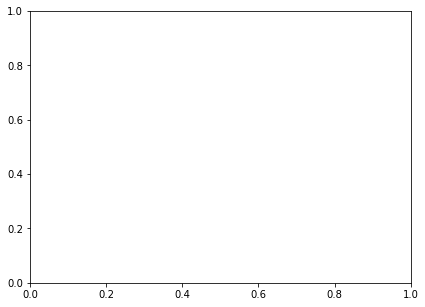

In [28]:
from sklearn.cluster import DBSCAN
# now plot each dataset
plt.figure(figsize=(15,5))
for i,X in enumerate([X1]):
    plt.subplot(1,2,i+1)
    plt.plot(X[:, 0], X[:, 1], 'r.', markersize=2) #plot the data
    plt.title('Variable name: X{0}'.format(i+2))
    plt.xlabel('X{0}, Feature 1'.format(i+2))
    plt.ylabel('X{0}, Feature 2'.format(i+2))
    plt.grid()

plt.show()

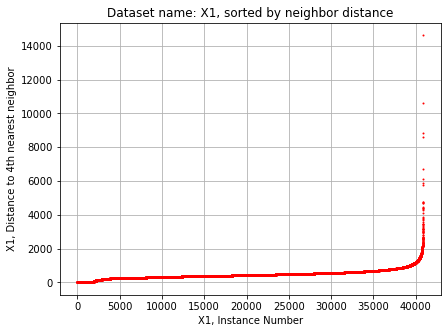

In [29]:
# lets first look at the connectivity of the graphs and distance to the nearest neighbors
from sklearn.neighbors import kneighbors_graph

#=======================================================
# CHANGE THESE VALUES TO ADJUST MINPTS FOR EACH DATASET
X1_N = 4
#=======================================================

# create connectivity graphs before calcualting the hierarchy
X1_knn_graph = kneighbors_graph(X1, X1_N, mode='distance') # calculate distance to four nearest neighbors 

N1 = X1_knn_graph.shape[0]
X1_4nn_distances = np.zeros((N1,1))
for i in range(N1):
    X1_4nn_distances[i] = X1_knn_graph[i,:].max()

X1_4nn_distances = np.sort(X1_4nn_distances, axis=0)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(N1), X1_4nn_distances, 'r.', markersize=2) #plot the data
plt.title('Dataset name: X1, sorted by neighbor distance')
plt.xlabel('X1, Instance Number')
plt.ylabel('X1, Distance to {0}th nearest neighbor'.format(X1_N))
plt.grid()

plt.show()

In [32]:
from sklearn.cluster import DBSCAN

#=====================================
# ENTER YOUR CODE HERE TO CHANGE MINPTS AND EPS FOR EACH DATASET
X1_minpts = 500 
X1_eps = 0.5
#=====================================

for i, (data, minpts, eps) in enumerate(zip([X1],[X1_minpts],[X1_eps])):

    db = DBSCAN(eps=eps, min_samples=minpts).fit(data)
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

    # mark the samples that are considered "core"
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True

    plt.figure(figsize=(15,4))
    unique_labels = set(labels) # the unique labels
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = 'k'

        class_member_mask = (labels == k)

        xy = data[class_member_mask & core_samples_mask]
        # plot the core points in this class
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                 markeredgecolor='w', markersize=6)

        # plot the remaining points that are edge points
        xy = data[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                 markeredgecolor='w', markersize=3)

    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.grid()
    plt.show()

TypeError: '(slice(None, None, None), 0)' is an invalid key

<Figure size 1080x288 with 0 Axes>